# **Problema de 100 Metros Planos abordado con SKLearn**

## 1. Cargamos los Datos y Obtenemos los Vectores $x$ y $y$ 
Para cargar los datos utilizamos la librería $urllib.request$, y posteriomente guardamos los datos de los años en el vector $x$ y los tiempos en el vector $y$ de tal manera que a cada años le corresponde un tiempo del atleta (corredor).

In [1]:
import numpy as np #Para hacer operaciones matemáticas
import urllib.request #Para importar las bases de datos

data = urllib.request.urlretrieve('https://raw.githubusercontent.com/sdrogers/fcmlcode/master/notebooks/data/olympic100m.txt', 'olympic100m.txt')
data = np.loadtxt('olympic100m.txt',delimiter=',') #Separamos los datos por el delimitador

x = data[:,0][:,None] #En x estarán los Años
y = data[:,1][:,None] #En y estarán los Tiempos

print('A continuación se muestra el Vector Columna de los Años:')
print(x)
print('######################################################################')
print('A continuación se muestra el Vector Columna de los Tiempos:')
print(y)

A continuación se muestra el Vector Columna de los Años:
[[1896.]
 [1900.]
 [1904.]
 [1906.]
 [1908.]
 [1912.]
 [1920.]
 [1924.]
 [1928.]
 [1932.]
 [1936.]
 [1948.]
 [1952.]
 [1956.]
 [1960.]
 [1964.]
 [1968.]
 [1972.]
 [1976.]
 [1980.]
 [1984.]
 [1988.]
 [1992.]
 [1996.]
 [2000.]
 [2004.]
 [2008.]]
######################################################################
A continuación se muestra el Vector Columna de los Tiempos:
[[12.  ]
 [11.  ]
 [11.  ]
 [11.2 ]
 [10.8 ]
 [10.8 ]
 [10.8 ]
 [10.6 ]
 [10.8 ]
 [10.3 ]
 [10.3 ]
 [10.3 ]
 [10.4 ]
 [10.5 ]
 [10.2 ]
 [10.  ]
 [ 9.95]
 [10.14]
 [10.06]
 [10.25]
 [ 9.99]
 [ 9.92]
 [ 9.96]
 [ 9.84]
 [ 9.87]
 [ 9.85]
 [ 9.69]]


## 2. Visualización de los datos
Para visualizar los datos que hemos logrado obtener utilizamos la librería $matplotlib.pyplot$ y procedemos a colocar los parámetros necesarios para el ploteo.

Text(0.5, 1.0, 'Tiempos de los 100 metros planos')

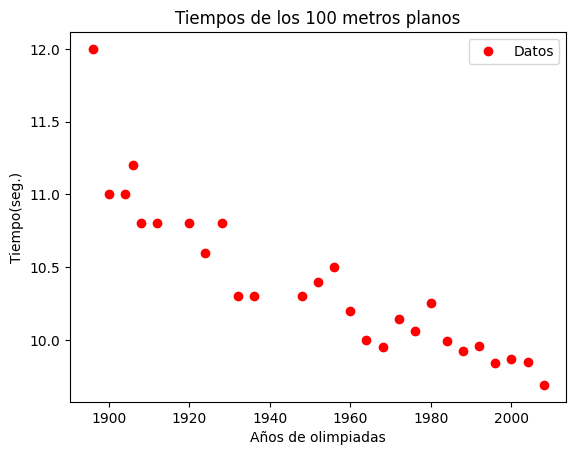

In [2]:
import matplotlib.pyplot as plt #Librería para plotear

fig = plt.figure()
plt.plot(x,y,'ro',label='Datos') #Gráfica de los datos extraídos de los Años VS los Tiempos
plt.legend()
plt.xlabel('Años de olimpiadas') #Etiqueta eje x
plt.ylabel('Tiempo(seg.)') #Etiqueta eje y
plt.title('Tiempos de los 100 metros planos') #Etiqueta título

## 3. Entrenamiento del Modelo Lineal

In [3]:
from sklearn.linear_model import LinearRegression #Función del SKLearn para hacer la Regresión Lineal
import sklearn
from sklearn.metrics import r2_score

model = LinearRegression() #La variable "model" será el modelo. / a + bx

model = model.fit(x,y) #Entreno el modelo / obtengo pesos / 
#Ajusto los datos al modelo a=3.64164559e+01 y b=-1.33308857e-02
# 3.6416 + -1.3330x

a = model.intercept_  # Valor de A (intercepto)
b = model.coef_[0]    # Valor de B (pendiente)

print(f"A (intercepto): {a}")
print(f"B (pendiente): {b}")


A (intercepto): [36.4164559]
B (pendiente): [-0.01333089]


## 4. Estimación y Cálculo del Error de Entrenamiento

$${ E}({\bf w})= \frac{1}{L}\sum_{l=1}^{L}{\left( { y }^{(l)}-\hat{ y}^{(l)} \right)^2}$$

In [4]:
#Primer Predict
y_hat = model.predict(x) #Xe * W
print(y_hat)

print('')

Error_train_mse = sklearn.metrics.mean_squared_error(y, y_hat)
print(f'El error cuadrático medio de entrenamiento es: {Error_train_mse}')

[[11.14109659]
 [11.08777305]
 [11.03444951]
 [11.00778774]
 [10.98112597]
 [10.92780242]
 [10.82115534]
 [10.76783179]
 [10.71450825]
 [10.66118471]
 [10.60786117]
 [10.44789054]
 [10.39456699]
 [10.34124345]
 [10.28791991]
 [10.23459637]
 [10.18127282]
 [10.12794928]
 [10.07462574]
 [10.02130219]
 [ 9.96797865]
 [ 9.91465511]
 [ 9.86133157]
 [ 9.80800802]
 [ 9.75468448]
 [ 9.70136094]
 [ 9.64803739]]

El error cuadrático medio de entrenamiento es: 0.050307110475657967


## 5. Gráfica de los Datos y el Modelo Lineal

Text(0.5, 1.0, 'Tiempos de los 100 metros planos')

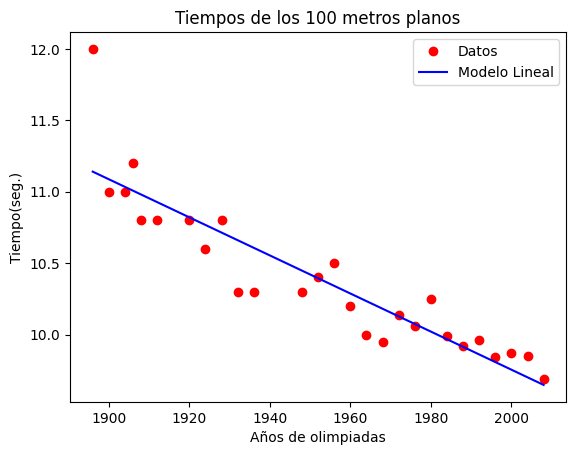

In [5]:
fig = plt.figure()
plt.plot(x,y,'ro',label='Datos') #Datos
plt.plot(x,y_hat,'b',label='Modelo Lineal') #Modelo Lineal
plt.legend()
plt.xlabel('Años de olimpiadas')
plt.ylabel('Tiempo(seg.)')
plt.title('Tiempos de los 100 metros planos')

## 6. Predicción y Cálculo del Error del Nuevo Dato (De Prueba)

Predecir el tiempo que obtendrá el ganador de la carrera de 100 metros planos masculino en los Juegos Olímpicos de 2016, utilizando los tiempos históricos de los ganadores.

In [6]:
x_new = np.array([np.array([2016])]) #Dato de prueba 2040
print(x_new)

y_new = model.predict(x_new)
print('La estimación del dato de prueba es: '+ str(y_new))

y_real = np.array([np.array([9.8])]) #Es el que el corredor hizo en esa época (2016)

Error_test_mse = sklearn.metrics.mean_squared_error(y_real, y_new)
print('El error cuadrático de prueba es: '+ str(Error_test_mse))

[[2016]]
La estimación del dato de prueba es: [[9.54139031]]
El error cuadrático de prueba es: 0.0668789721723917


## 7. Gráfica de los Datos, el Modelo Lineal y la Estimación del Dato de Prueba

Text(0.5, 1.0, 'Tiempos de los 100 metros planos')

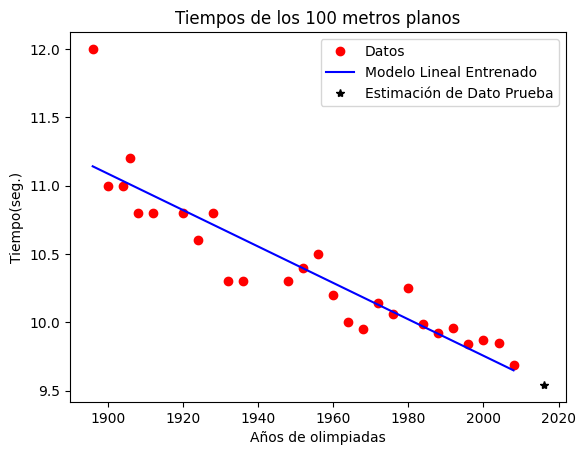

In [7]:
fig = plt.figure()
plt.plot(x,y,'ro',label='Datos') #Puntos rojos
plt.plot(x,y_hat,'b',label='Modelo Lineal Entrenado') #Línea azul
plt.plot(x_new,y_new,'*k',label='Estimación de Dato Prueba') #La estrellita para el 2016
plt.legend()
plt.xlabel('Años de olimpiadas')
plt.ylabel('Tiempo(seg.)')
plt.title('Tiempos de los 100 metros planos')